# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Muhammad Nur Rachman Nidhi Suryono
- Email:naudhi153@gmail.com
- Id Dicoding: nurrachman

## Menentukan Pertanyaan Bisnis

- Produk dengan penjualan terbanyak ? Termasuk dalam kategori produk mahal atau murah ?

- Berapa rata-rata pengeluaran pelanggan ? Apakah berhubungan dengan geografis ?

- Lokasi geografis mana yang memiliki pelanggan terbanyak ?

- Tingkat kepuasan pembelian terhadap layanan ?

- Bagaimana data pembelian order setiap bulan ?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import matplotlib.image as mpimg
from scipy import stats
import urllib

## Data Wrangling

### Gathering Data

In [ ]:
dir = "/content/"

orders = pd.read_csv(dir + 'orders_dataset.csv')
items = pd.read_csv(dir + 'order_items_dataset.csv')
products = pd.read_csv(dir + 'products_dataset.csv')
payments = pd.read_csv(dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(dir + 'customers_dataset.csv')
sellers = pd.read_csv(dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(dir + 'geolocation_dataset.csv')
category = pd.read_csv(dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

In [ ]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [ ]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_oo:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

In [ ]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  data['items'][column] = pd.to_datetime(data['items'][column])

In [ ]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

In [ ]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geo,1000163,261831
category,71,0


In [ ]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name + '\n', null_counts[df_name], '\n' + '-'*20 + '\n')

orders
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 
--------------------

items
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 
--------------------

products
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 
--------------------

payments
 order_id                0
payment_sequential      0
payment_type        

### Cleaning Data

Cleaning Order Data

In [ ]:
print(data['orders']['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


Bagian ini mencetak jumlah pesanan untuk setiap status pesanan dalam DataFrame 'orders'.

In [ ]:
print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Taking only delivered orders we still get 97.02% of data.


Bagian ini mencetak persentase pesanan yang telah dikirim (status 'delivered') dari total jumlah pesanan dalam DataFrame 'orders'.

In [ ]:
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace=True)

Bagian ini mengidentifikasi dan menghapus baris-baris dalam setiap DataFrame yang memiliki nilai NaN pada kolom 'order_delivered_customer_date' dalam DataFrame 'orders'.

In [ ]:
for key, value in data.items():
    for col in value.columns:
        # print only col names where there are nans
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [ ]:
print('There are only ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders that are missing delivery dates.')

There are only 8 orders that are missing delivery dates.


Kode ini menghitung dan mencetak persentase nilai NaN untuk setiap kolom dalam setiap DataFrame. Jika ada kolom dengan nilai NaN, kolom tersebut dan persentasenya akan dicetak.

In [ ]:
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

Kode ini menghitung dan mencetak jumlah pesanan yang memiliki nilai NaN pada kolom 'order_delivered_customer_date' dalam DataFrame 'orders'. Kemudian, baris-baris yang memiliki nilai NaN pada kolom ini dihapus dari DataFrame.

In [ ]:
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

Bagian ini menambahkan kolom baru 'delivered_on_time' ke DataFrame 'orders', yang menunjukkan apakah pesanan dikirim tepat waktu atau terlambat berdasarkan perbandingan antara tanggal pengiriman pelanggan dan estimasi tanggal pengiriman.

Cleaning Reviews Data

In [ ]:
print('Review cols: ', data['reviews'].columns.values)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


Kode ini mencetak nama kolom dalam DataFrame 'reviews'.

In [ ]:
data['reviews'].drop(['review_comment_title'], axis=1, inplace=True)

Kode ini menghapus kolom 'review_comment_title' dari DataFrame 'reviews'.

In [ ]:
data['reviews']['review_comment_message'] = data['reviews']['review_comment_message'].notnull().astype(int)

Kode ini mengganti nilai NaN dengan 0 dan nilai yang bukan NaN dengan 1 pada kolom 'review_comment_message' dalam DataFrame 'reviews'. Ini dapat dianggap sebagai pendekatan di mana 0 menunjukkan ketiadaan komentar dan 1 menunjukkan adanya komentar.

Cleaning Products Data

In [ ]:
print('Product cols: ', data['products'].columns.values)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


Kode ini mencetak nama kolom dalam DataFrame 'products'.

In [ ]:
product_drop_cols = ['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
data['products'].drop(product_drop_cols, axis=1, inplace=True)

Kode ini menghapus beberapa kolom yang tidak diminati dari DataFrame 'products'.

In [ ]:
data['products']['product_category_name'].fillna(value='outro', inplace=True)

Kode ini mengganti nilai NaN pada kolom 'product_category_name' dengan string 'outro'.

In [ ]:
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

Kode ini mengganti nilai NaN pada kolom 'product_photos_qty' dengan 0.

Cleaning Geo Data

In [ ]:
data['geo'].duplicated().sum()

261831

Kode ini menggunakan metode duplicated() pada DataFrame 'geo' untuk menemukan baris-baris yang merupakan duplikat dan kemudian menggunakan sum() untuk menghitung jumlah total duplikat.

In [ ]:
data['geo'].drop_duplicates()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


Kode ini menghapus baris-baris duplikat dari DataFrame 'geo' menggunakan metode drop_duplicates(). Argumen inplace=True mengubah DataFrame 'geo' yang ada tanpa membuat DataFrame baru, sehingga hasilnya langsung diterapkan pada DataFrame yang ada.

## Exploratory Data Analysis (EDA)

### Explore Customers

In [ ]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
62496,ad51902b16f520adb4013d26a3952d51,ea84410de34ba26347ffd98c6e8bff2e,22020,rio de janeiro,RJ
91668,834fbe386c3ff163d252b37b5487e118,fe19a08291d3d1fb9debf8ee44ec129e,1226,sao paulo,SP
52162,79cfcbd00dfce1c4e9208032ab7aab15,acaf5177d6de60fda7ce77c48abb5230,8674,suzano,SP
61381,2ef489da4e9da946da422e562cd90860,6b145fab208e8a2789163bfece8a42fc,5707,sao paulo,SP
58905,f6bb7b61f69f163fa92942a84c9233d6,623632ea052eb9b98d86fba7b8498df8,91420,porto alegre,RS


Kode ini menggunakan metode sample(5) untuk mengambil secara acak 5 baris dari DataFrame 'customers' dan menampilkannya.

In [ ]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

DataFrame 'customers' dikelompokkan berdasarkan kolom "customer_city". Menggunakan metode nunique(), dihitung jumlah pelanggan unik untuk setiap kota, dan hasilnya diurutkan secara menurun.

In [ ]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

DataFrame 'customers' dikelompokkan berdasarkan kolom "customer_state". Menggunakan metode nunique(), dihitung jumlah pelanggan unik untuk setiap negara bagian, dan hasilnya diurutkan secara menurun.

### Explore Payments

In [ ]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
55613,a5dcc015b748b353c2ddfb0939d36c58,1,credit_card,10,132.08
35132,1776f9cc0f976e7aa0e8372a5325c41a,1,credit_card,8,82.14
102066,2d394ce1703ceeb355e2446e4a7a6bf4,1,credit_card,6,381.88
47392,debac352e54823e317babc2b6182b188,1,boleto,1,62.00
7325,a9f7beeff5d3fdb2859b22c0dfde51ce,1,credit_card,4,254.22


Kode ini menggunakan metode sample(5) untuk mengambil secara acak 5 baris dari DataFrame 'payments' dan menampilkannya.

In [ ]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64

DataFrame 'payments' dikelompokkan berdasarkan kolom "payment_type". Menggunakan metode nunique(), dihitung jumlah order unik untuk setiap jenis pembayaran, dan hasilnya diurutkan secara menurun.

### Explore Orders

In [ ]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
48970,87e145665c1cdfcec92e9e74e2469cfc,1c32cebc829f4e5af3b6ae7e7d25ba37,delivered,2017-08-28 12:55:29,2017-08-28 13:10:11,2017-09-05 15:56:00,2017-09-13 21:25:28,2017-10-02,On Time
71964,161b62294734a5b8c35890b6a607c7d8,2d5b2e10598f23bee8a27fd92f570209,delivered,2018-01-11 13:27:24,2018-01-11 13:39:26,2018-01-15 23:08:35,2018-01-19 16:08:58,2018-02-05,On Time
75087,ac05f13680c4e4da78427313ecbe0a6e,b895d8a9142551ff5d7caad5e3d379b4,delivered,2018-07-05 11:34:09,2018-07-05 16:30:33,2018-07-05 13:10:00,2018-07-12 21:28:58,2018-07-27,On Time
52056,92b48ee2f99d597171a30fc4a45e81ad,6c8c6dcacef23de010f797976a3a1790,delivered,2017-04-18 19:53:27,2017-04-18 20:05:17,2017-04-24 12:08:34,2017-05-11 12:24:12,2017-05-22,On Time
27357,3f1d42a217afb22fc9ee819f602664b2,7b66afe859de8d2c1e6b143c26a6b4b1,delivered,2018-07-27 12:27:02,2018-07-27 13:04:11,2018-07-30 20:10:00,2018-07-31 15:14:32,2018-08-01,On Time


Kode ini menggunakan metode sample(5) untuk mengambil secara acak 5 baris dari DataFrame 'orders' dan menampilkannya.

In [ ]:
data['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

Kode ini menggunakan metode describe() untuk melihat statistik deskriptif (seperti mean, median, min, max, dll.) dari kolom 'delivered_on_time' dalam DataFrame 'orders'. Statistik ini memberikan gambaran umum tentang distribusi nilai dalam kolom tersebut.

### Explore Customers_df & Orders_df

In [ ]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


Pada tahap ini, DataFrame 'customers' dan 'orders' digabungkan berdasarkan kolom "customer_id" dengan menggunakan metode merge. Penggabungan dilakukan dengan metode left join (how="left"), sehingga semua baris dari 'customers' tetap ada dalam hasil, dan kolom-kolom dari 'orders' ditambahkan. Hasil penggabungan disimpan dalam DataFrame baru customers_orders_df, dan head() digunakan untuk menampilkan beberapa baris pertama.

In [ ]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


DataFrame 'payments' dan 'reviews' digabungkan berdasarkan kolom "order_id" dengan metode left join. Hasil penggabungan disimpan dalam DataFrame baru payments_reviews_df, dan head() digunakan untuk menampilkan beberapa baris pertama.

In [ ]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


DataFrame 'payments_reviews_df' diurutkan berdasarkan kolom "payment_value" secara menurun dengan menggunakan metode sort_values.

In [ ]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

DataFrame 'payments_reviews_df' dikelompokkan berdasarkan kolom "payment_type". Kemudian, menggunakan metode agg, dihitung jumlah unik order_id untuk setiap jenis pembayaran ("nunique") dan nilai minimum serta maksimum dari "payment_value" untuk setiap jenis pembayaran.

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


DataFrame 'customers_orders_df' dan 'payments_reviews_df' digabungkan berdasarkan kolom "order_id" dengan metode left join. Hasilnya disimpan dalam DataFrame baru customers_df, dan head() digunakan untuk menampilkan beberapa baris pertama.

### Explore Items & Sellers

In [ ]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Pada tahap ini, DataFrame 'items' dan 'sellers' digabungkan berdasarkan kolom "seller_id" dengan menggunakan metode merge. Penggabungan dilakukan dengan metode left join (how="left"), sehingga semua baris dari 'items' tetap ada dalam hasil, dan kolom-kolom dari 'sellers' ditambahkan. Hasil penggabungan disimpan dalam DataFrame baru item_seller_df, dan head() digunakan untuk menampilkan beberapa baris pertama.

In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64

DataFrame 'item_seller_df' dikelompokkan berdasarkan kolom "seller_city". Kemudian, menggunakan metode nunique(), dihitung jumlah penjual unik untuk setiap kota penjual, dan hasilnya diurutkan secara menurun. Metode head(10) digunakan untuk menampilkan 10 kota dengan jumlah penjual terbanyak.

In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64

ataFrame 'item_seller_df' dikelompokkan berdasarkan kolom "seller_state". Kemudian, menggunakan metode nunique(), dihitung jumlah penjual unik untuk setiap negara bagian penjual, dan hasilnya diurutkan secara menurun. Metode head(10) digunakan untuk menampilkan 10 negara bagian dengan jumlah penjual terbanyak.

### Explore Products & Category

In [ ]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


DataFrame 'products' dan 'category' digabungkan berdasarkan kolom "product_category_name" dengan metode left join. Hasilnya disimpan dalam DataFrame baru product_df.

In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

DataFrame 'product_df' dikelompokkan berdasarkan kolom "product_category_name". Menggunakan metode nunique(), dihitung jumlah produk unik untuk setiap kategori produk, dan hasilnya diurutkan secara menurun. Ditampilkan 10 kategori dengan jumlah produk terbanyak.

In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

DataFrame 'product_df' dikelompokkan berdasarkan kolom "product_category_name_english". Menggunakan metode nunique(), dihitung jumlah produk unik untuk setiap kategori produk (versi bahasa Inggris), dan hasilnya diurutkan secara menurun. Ditampilkan 10 kategori dengan jumlah produk terbanyak.

In [ ]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


DataFrame 'product_df' dan 'item_seller_df' digabungkan berdasarkan kolom "product_id" dengan metode left join. Hasilnya disimpan dalam DataFrame baru sellers_df.

In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


DataFrame 'sellers_df' diurutkan berdasarkan kolom "price" secara menurun.

In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

DataFrame 'sellers_df' dikelompokkan berdasarkan kolom "product_category_name_english". Menggunakan metode agg, dihitung jumlah unik order_id, harga minimum, dan harga maksimum untuk setiap kategori produk.

### Explore Geo

In [ ]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
893565,87060,-23.446639,-51.948363,maringa,PR
87635,4348,-23.641335,-46.653747,sao paulo,SP
529385,29056,-20.301462,-40.298594,vitoria,ES
468855,24020,-22.890948,-43.118335,niteroi,RJ
885708,86047,-23.345690,-51.181527,londrina,PR


Kode ini menggunakan metode sample(5) untuk mengambil secara acak 5 baris dari DataFrame 'geo' dan menampilkannya.

In [ ]:
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

DataFrame 'geo' dikelompokkan berdasarkan kolom "geolocation_zip_code_prefix". Kemudian, menggunakan metode size(), dihitung jumlah baris untuk setiap kode pos, dan hasilnya diurutkan secara menurun.

In [ ]:
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 38400].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
645450,38400,-18.915960,-48.278974,uberlandia,MG
645456,38400,-18.900442,-48.260759,uberlandia,MG
645460,38400,-18.913015,-48.262132,uberlandia,MG
645461,38400,-18.922381,-48.282111,uberlandia,MG
645471,38400,-18.922160,-48.271125,uberlandia,MG


DataFrame 'geo' disaring untuk hanya menampilkan baris-baris dengan kode pos 38400, dan menggunakan head() untuk menampilkan 5 baris pertama dari hasil filtrasi.

### Explore All Data

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


DataFrame 'customers_df' dan 'sellers_df' digabungkan berdasarkan kolom "order_id" dengan metode left join. Hasilnya disimpan dalam DataFrame baru all_data, dan head(20) digunakan untuk menampilkan 20 baris pertama.

In [ ]:
all_data_df = all_data.drop_duplicates('order_id')

DataFrame 'all_data' dihapus duplikat berdasarkan kolom 'order_id', dan hasilnya disimpan dalam DataFrame baru all_data_df.

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimat

Kode ini menampilkan informasi ringkas tentang DataFrame 'all_data_df', termasuk tipe data dan jumlah nilai yang tidak kosong untuk setiap kolom.

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


DataFrame 'all_data' dikelompokkan berdasarkan kolom "customer_state". Menggunakan metode agg, dihitung jumlah unik order_id dan total payment_value untuk setiap negara bagian pelanggan. Hasilnya diurutkan berdasarkan total payment_value secara menurun.

In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

DataFrame 'all_data' dikelompokkan berdasarkan kolom "product_category_name_english". Menggunakan metode agg, dihitung jumlah unik order_id, nilai review_score minimum, dan nilai review_score maksimum untuk setiap kategori produk.

### RFM

In [ ]:
all_data['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
all_data['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

Kode ini menampilkan tanggal pembelian terbaru dan terlama dalam DataFrame 'all_data'.

In [ ]:
now=dt.datetime(2018,10,20)

Saya asumsikan tanggal hari ini 20-10-2018

In [ ]:
""" all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

rfm = all_data.groupby('customer_id',as_index=False).agg({
     'order_purchase_timestamp' : lambda x : (now - x.max()).days,
    'order_id': lambda x : len(x),
    'price': lambda x : x.sum()
}) """

" all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])\n\nrfm = all_data.groupby('customer_id',as_index=False).agg({\n     'order_purchase_timestamp' : lambda x : (now - x.max()).days,\n    'order_id': lambda x : len(x),\n    'price': lambda x : x.sum() \n}) "

In [ ]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [ ]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list

Kode ini menghitung metrik RFM (Recency, Frequency, Monetary) untuk setiap pelanggan dalam DataFrame 'all_data'. Kemudian, hasilnya disusun ke dalam DataFrame baru 'rfm'.

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      96470 non-null  float64
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385.0,8,13440.00
86603,de832e8dbb1f588a47013e53feaa67cc,508.0,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247.0,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162.0,7,9520.14
56788,926b6a6fb8b6081e00b335edaf578d35,549.0,2,7998.00
...,...,...,...,...
64798,a6c9cacb399083fbf6497249c9d3a140,NaN,0,0.00
64774,a6b360081493d93571023c728c118671,NaN,0,0.00
64762,a6aa8b8c736d70055ab404479f39f528,NaN,0,0.00
64748,a6a3ccd6981f76577a6cfcac362430b2,NaN,0,0.00


In [ ]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
52277,86dc2ffce2dfff336de2f386a786e574,764.0,3,134.97
20701,355077684019f7f60a031656bd7262b8,746.0,1,29.90
46540,7812fcebfc5e8065d31e1bb5f0017dae,746.0,1,29.99
85811,dc607dc98d6a11d5d04d9f2a70aa6c34,746.0,1,74.90
89911,e6f959bf384d1d53b6d68826699bba12,746.0,1,128.90
...,...,...,...,...
99317,ffaded93e5a1fce06363cfb6905676a1,NaN,0,0.00
99333,ffb81db92e7ac00ecfac978f673be8a6,NaN,0,0.00
99405,ffe7ffb7c7ae0d42808f387578426b3b,NaN,0,0.00
99434,fffc22669ca576ae3f654ea64c8f36be,NaN,0,0.00


In [ ]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437.0,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391.0,38,3039.62
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499.0,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160.0,24,359.76
42897,6ee2f17e3b6c33d6a9557f280edd2925,589.0,24,4557.60
...,...,...,...,...
64798,a6c9cacb399083fbf6497249c9d3a140,NaN,0,0.00
64774,a6b360081493d93571023c728c118671,NaN,0,0.00
64762,a6aa8b8c736d70055ab404479f39f528,NaN,0,0.00
64748,a6a3ccd6981f76577a6cfcac362430b2,NaN,0,0.00


Kode ini menampilkan dan menganalisis informasi dan statistik dari DataFrame 'rfm', termasuk pengurutan berdasarkan kolom Recency, Monetary, dan Frequency.

In [ ]:
all_data.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 503022.06
               health_beauty                  467499.05
               watches_gifts                  436776.29
               sports_leisure                 392419.98
               computers_accessories          350376.44
...                                                 ...
RS             fashion_childrens_clothes           0.00
               fashio_female_clothing              0.00
MA             fashion_underwear_beach             0.00
PB             fashion_underwear_beach             0.00
AC             agro_industry_and_commerce          0.00

[1691 rows x 1 columns]

In [ ]:
all_data.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city product_category_name_english             
sao paulo     health_beauty                    191242.49
              bed_bath_table                   181641.26
              watches_gifts                    166383.89
              sports_leisure                   150453.76
              computers_accessories            142404.28
...                                                  ...
caraguatatuba construction_tools_construction       0.00
              construction_tools_safety             0.00
              costruction_tools_garden              0.00
              diapers_and_hygiene                   0.00
cafeara       books_imported                        0.00

[54407 rows x 1 columns]

In [ ]:
all_data.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,66039
3,4.0,22150
2,3.0,9649
1,2.0,3899
0,1.0,13114


Kode ini melakukan analisis grupasi berdasarkan negara bagian dan kategori produk, kota dan kategori produk, serta skor ulasan pelanggan.

In [ ]:
all_data=pd.merge(
    left=all_data,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

Kode ini menggabungkan DataFrame 'all_data' dengan DataFrame 'rfm' berdasarkan kolom 'customer_id' menggunakan metode left join. Hasilnya disimpan kembali dalam DataFrame 'all_data'.

In [ ]:
all_data.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Recency,Frequency,Monetary
562969,b0232f62bd310b605fc9ba834860ce2c,1350e2fa0415f0c50796bde8c33325a2,4608,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2043910,e3fe72696c4713d64d3c10afe71e75ed,c4ebedb09beb89cc0314c5c0c33f8053,9961,diadema,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
161493,e3b8e1052eabf24ff52843086a5f4508,c2fef0a4a3a237288e3ab4bb2df94c18,35930,joao monlevade,MG,NaN,NaN,NaT,NaT,NaT,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
466947,9eee33666a68d14a3cfc3d3da1a876dd,accd68fd87adda3d6360d77daafd964d,25525,sao joao de meriti,RJ,NaN,NaN,NaT,NaT,NaT,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2287048,1ff23faa252154298c3e52a1e36c1cda,843fce53a8077f28ff10cbfaab2ab957,27933,macae,RJ,NaN,NaN,NaT,NaT,NaT,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [ ]:
# Specify the path where to save the CSV file
output_csv_path = "/content/main_data.csv"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

DataFrame 'all_data_df' disimpan ke dalam file CSV dengan path yang ditentukan (output_csv_path). Parameter index=False menghilangkan indeks dari data yang disimpan.

## Visualization & Explanatory Analysis

In [ ]:
all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP,521.0,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC,280.0,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP,153.0,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP,220.0,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP,82.0,1,230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305337,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,17400.0,garca,SP,195.0,1,74.90
2305338,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,14802.0,araraquara,SP,198.0,1,114.90
2305339,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,3304.0,sao paulo,SP,194.0,1,37.00
2305340,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,14840.0,guariba,SP,350.0,1,689.00


### Pertanyaan 1: Produk dengan penjualan terbanyak ? Termasuk dalam kategori produk mahal atau murah ?

In [ ]:
# based on the schema, we merge the products dataset with the items dataset
items_product = data['items'].merge(data['products'], on= 'product_id', how= 'inner')
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# pivot table aggregating by # of items bought and mean of price ('will be the same')
product_revenue = orders_ip.pivot_table(index=['product_id'], aggfunc= {'order_item_id': 'sum', 'price':'mean'})
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
product_revenue.rename(columns={'order_item_id':'sell_probability'}, inplace= True)
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)
product_revenue.sort_values(by='total', ascending= False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.006643,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.001118,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.004998,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.011082,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.016484,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000124,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000031,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000031,2.900000,2.900000


Dalam proses ini, data produk ('products') dan data item ('items') digabungkan menggunakan kolom 'product_id' sebagai kunci penggabungan, membentuk DataFrame baru yang disebut 'items_product'. Selanjutnya, DataFrame 'items_product' digabungkan dengan data pesanan ('orders') berdasarkan kolom 'order_id', membentuk DataFrame 'orders_ip'. Dilakukan pembuatan tabel pivot untuk mengagregasi data berdasarkan jumlah item yang dibeli dan rata-rata harga produk. Hasilnya, DataFrame 'product_revenue' terbentuk, yang mencakup kolom 'sell_probability' (jumlah item terjual) dan 'total' (pendapatan total). Selanjutnya, kolom 'sell_probability' dinormalisasi dengan membaginya dengan panjang DataFrame untuk menghitung probabilitas penjualan relatif. DataFrame diurutkan berdasarkan pendapatan total ('total') secara menurun.

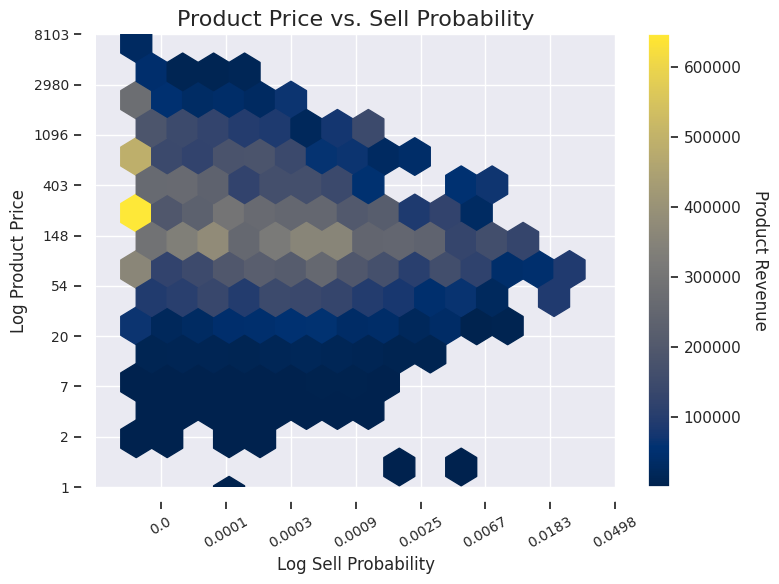

In [ ]:
# Custom function to set plot design
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

plt.xlim(-11, -3)
plt.ylim(0, 9)

plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Use different colormaps and set the number of grids
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='cividis')

# Added colorbar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue', rotation=270, labelpad=20, fontsize=12)

# Customize the layout and save the image
plt.tight_layout()
plt.savefig('/content/product_probability_sum_custom.png', dpi=300)

plt.show()

Dilakukan pembuatan scatter plot (hexbin plot) dengan menggunakan skala logaritmik pada sumbu-x dan sumbu-y. Digunakan juga skala logaritmik pada batang warna ('C') yang direpresentasikan oleh total pendapatan.

Ditambahkan colorbar untuk menunjukkan hubungan antara warna dan total pendapatan. Gambar disimpan dalam file dengan format PNG.

In [ ]:
product_id_counts = all_data.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

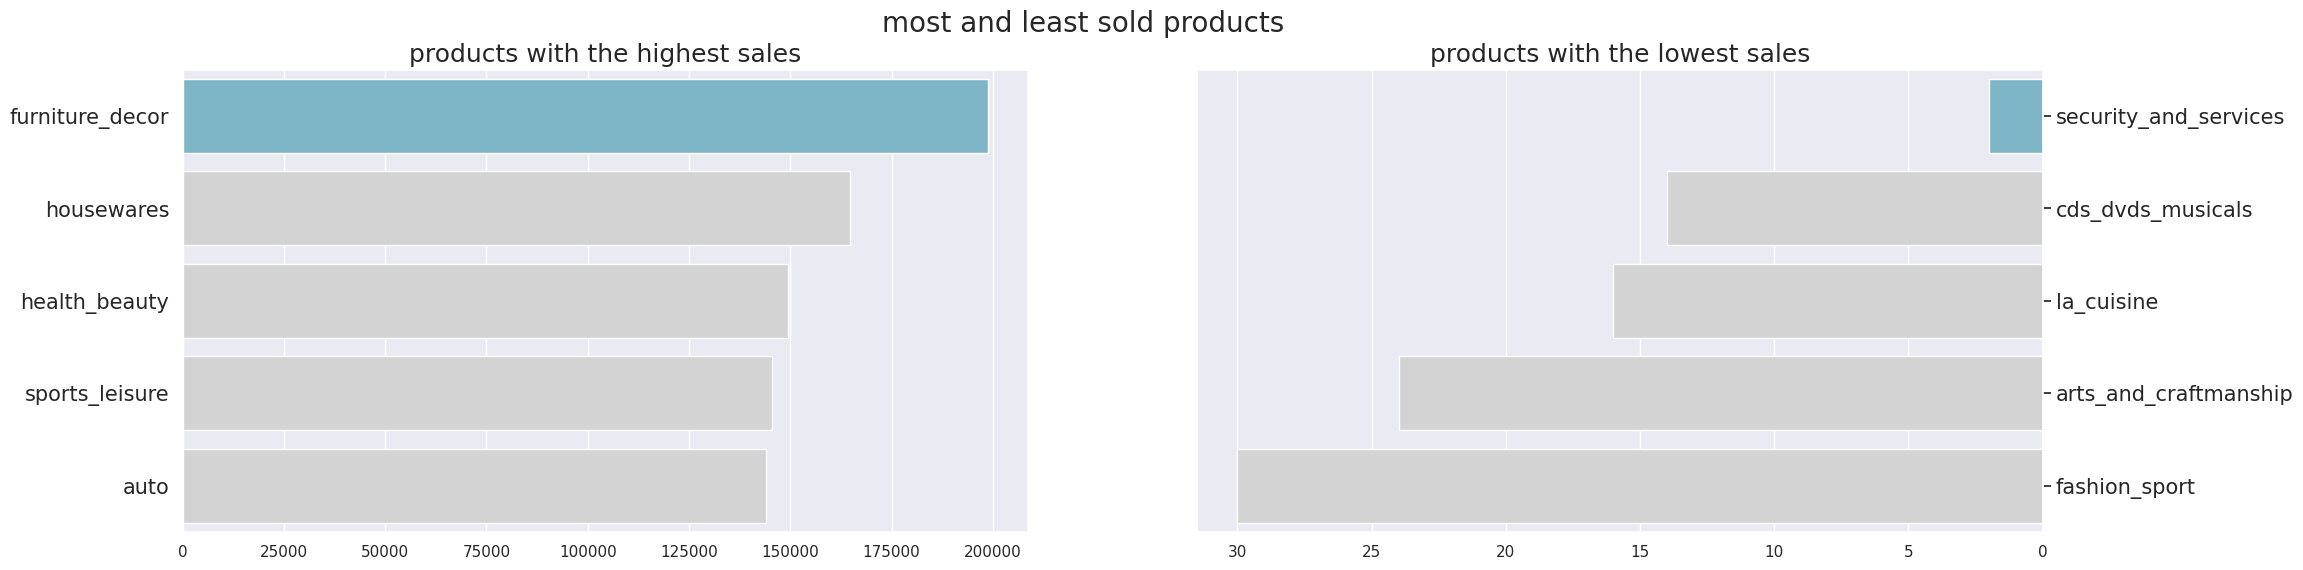

In [ ]:
Ditambahkan colorbar untuk menunjukkan hubungan antara warna dan total pendapatan. Gambar disimpan dalam file dengan format PNG.fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()


Kode di atas menciptakan visualisasi yang membandingkan kategori produk dengan penjualan tertinggi dan terendah. Pertama, dihitung jumlah produk dalam setiap kategori dengan menggunakan groupby pada kolom 'product_category_name_english'. Data kemudian diurutkan secara menurun, dan hasilnya disimpan dalam DataFrame sorted_df. Visualisasi tersebut dibuat menggunakan dua subplot dalam satu baris, dengan subplot pertama menampilkan lima kategori produk dengan penjualan tertinggi, dan subplot kedua menampilkan lima kategori produk dengan penjualan terendah.

Dalam kedua subplot tersebut, digunakan bar plot (sns.barplot) dengan sumbu x menunjukkan jumlah produk ('product_id') dan sumbu y menunjukkan nama kategori produk ('product_category_name_english'). Warna bar plot ditentukan menggunakan palet warna 'colors'. Subplot pertama diurutkan dari yang tertinggi, sedangkan subplot kedua diurutkan dari yang terendah. Selain itu, subplot kedua dibalikkan sumbu x-nya untuk memudahkan perbandingan.

Keseluruhan visualisasi diberi judul "most and least sold products" dan disertakan dengan label sumbu serta judul untuk setiap subplot. Output visualisasi ini disajikan dalam dua kolom untuk membandingkan dengan jelas antara kategori produk yang memiliki penjualan tertinggi dan terendah.

### Pertanyaan 2: Berapa rata-rata pengeluaran pelanggan ? Apakah berhubungan dengan geografis ?

In [ ]:
# merge customers dataset with orders and payments dataset.
pay_ord_cust = orders.merge(payments, on='order_id', how='outer').merge(customers, on='customer_id', how='outer')
customer_spent = pay_ord_cust.groupby('customer_unique_id').agg({'payment_value': 'sum'}).sort_values(by='payment_value', ascending=False)

# calculating mean customer spent and standard deviation
customer_mean = customer_spent['payment_value'].mean()
customer_std = stats.sem(customer_spent['payment_value'])

# estimating population average from sample
stats.t.interval(0.95, loc=customer_mean, scale= customer_std, df= len(customer_spent)- 1)

# estimate mean and confidence interval for customers in each region
customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
customer_regions.reset_index(inplace=True)

cis = stats.t.interval(.95, loc=customer_regions['payment_value']['mean'], scale=customer_regions['payment_value']['std']/np.sqrt(customer_regions['customer_unique_id']['count']), df= customer_regions['customer_unique_id']['count'] -1)

customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]

Dalam analisis data pelanggan, pesanan, dan pembayaran, terlebih dahulu dilakukan penggabungan dataset pelanggan dengan dataset pesanan dan pembayaran menggunakan kolom 'customer_id' dan 'order_id'. Selanjutnya, dihitung total pembayaran untuk setiap pelanggan, dengan hasilnya diurutkan secara menurun. Rata-rata dan deviasi standar dari total pengeluaran pelanggan juga diestimasi, sambil menghitung interval kepercayaan 95% untuk rata-rata tersebut. Selain itu, dilakukan pengelompokan berdasarkan region pelanggan, dihitung rata-rata dan deviasi standar total pembayaran untuk setiap region, dan diestimasi interval kepercayaan 95% untuk rata-rata pembayaran pelanggan dalam setiap region. Hasilnya, disajikan dalam DataFrame yang mencakup informasi rata-rata, deviasi standar, jumlah pelanggan, serta batas-batas interval kepercayaan rendah dan tinggi.


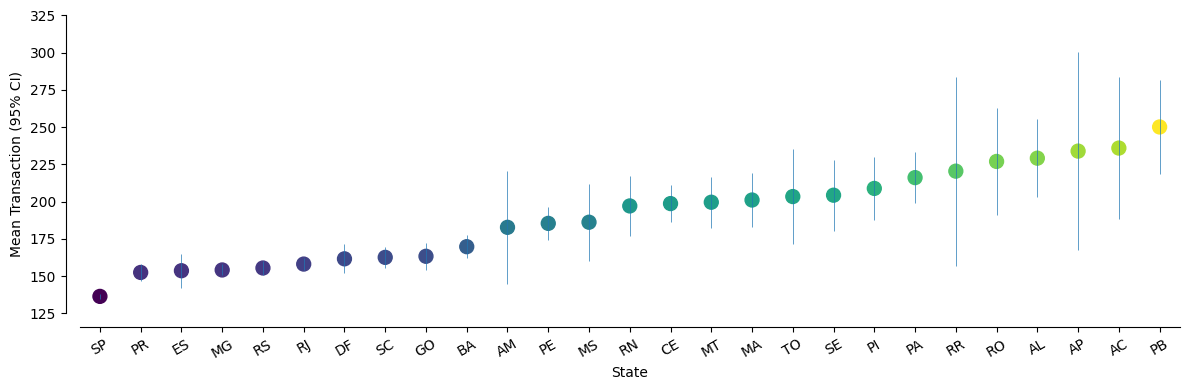

In [ ]:
# matplotlib adjustments
def default_plot(ax, spines):
    ax = plt.gca()
    # Remove unnecessary axes and ticks (top and bottom)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Set the ticks facing OUTWARD
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    # Remove grid
    #ax.grid('off')

    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')

    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

# sort ascendingly for easier to read plot
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# make figure
fig, ax = plt.subplots(figsize= (12, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation= 30)
plt.xlabel('State')
plt.ylabel('Mean Transaction (95% CI)')
plt.xlim(-0.5, 26.5)
plt.ylim(125, 325)
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=.5)
plt.tight_layout()
plt.savefig('/content/customers_ci.png', dpi= 300)


Kode di atas menyesuaikan konfigurasi plot menggunakan fungsi default_plot yang disediakan. Pertama, dilakukan pengurutan data customer_regions secara menaik berdasarkan rata-rata total pembayaran. Selanjutnya, dibuat plot menggunakan matplotlib dengan konfigurasi yang telah disesuaikan. Plot menampilkan rata-rata total pembayaran pelanggan untuk setiap negara bagian ('customer_state') beserta interval kepercayaan 95% ('ci_low' dan 'ci_hi'). Hasilnya, plot tersebut disimpan dalam file gambar dengan format PNG dan resolusi 300 dpi. Konfigurasi plot disesuaikan untuk memperjelas visualisasi dan kemudahan interpretasi.

### Pertanyaan 3: Lokasi geografis mana yang memiliki pelanggan terbanyak ?

In [ ]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')


customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502070,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,16a27e5ffd29a7cdf0e4984b0cab46b7,5.0,0.0,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.502070,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,23be511c12a57fe4052555f9c8905d8b,5.0,0.0,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.502070,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,e0fd752f37c8c6866ceb53b79b0715f6,5.0,0.0,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.502070,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,51fb9267e6687e5ab21e4539999188ed,5.0,0.0,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.502070,-47.396822
5,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,14409,franca,SP,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:01,2017-06-11 17:45:15,2017-06-13 09:18:58,...,1991c75dd8acba50a854d1a24a876827,5.0,1.0,2017-06-20,2017-06-21 16:20:42,14409,franca,SP,-20.502070,-47.396822
6,96fbbe8005e67d382b0fc453a288be02,8d153d12b59d763efeb3953822c51862,14409,franca,SP,0add19297766bc00a177a9ae740554eb,delivered,2018-04-01 22:50:57,2018-04-02 22:48:13,2018-04-05 20:49:46,...,bfe227aa0debbceffebfe9f4638dbcc2,2.0,0.0,2018-04-13,2018-04-16 01:14:09,14409,franca,SP,-20.502070,-47.396822
7,7d58157ef9ab184d29d36f009c7ad786,4dd678b3eb5be4a5589f5566ec386e09,14409,franca,SP,40a53ec6d0f15a6e4366a5e07c5f6ce2,delivered,2018-06-16 19:20:49,2018-06-17 19:15:14,2018-06-18 15:11:00,...,fe402e28e225c2b468946a5825d0e494,4.0,0.0,2018-06-21,2018-06-23 21:17:28,14409,franca,SP,-20.502070,-47.396822
8,d3c09791fc7ede919353f0488a3375a6,422b5643b144b86f0168965efd90c219,14409,franca,SP,bbc23131aab4b505c48b17061d069db2,delivered,2017-11-25 20:35:09,2017-11-25 20:51:53,2017-11-28 19:11:31,...,630b70f1a74f0e02084d9ced342c7b9b,5.0,1.0,2017-12-12,2017-12-13 00:45:51,14409,franca,SP,-20.502070,-47.396822
9,29e139325c0dac2e5a95c165699b68c3,d0fa1eaf9648a765ed0458e85186703d,14409,franca,SP,97eb8123f2508dda8d9234f0aca79572,delivered,2018-04-13 14:54:22,2018-04-13 15:13:22,2018-04-19 00:37:33,...,4a91f1456cb460b89751e9f115c3c3f1,5.0,0.0,2018-04-25,2018-04-27 14:02:33,14409,franca,SP,-20.502070,-47.396822


Dalam kode tersebut, pertama-tama, dilakukan analisis pada data geolokasi ('geo'). Dilakukan pengelompokan berdasarkan kode pos ('geolocation_zip_code_prefix') dan negara bagian ('geolocation_state') untuk menentukan apakah ada lebih dari satu negara bagian yang terkait dengan suatu kode pos. Hasilnya disimpan dalam DataFrame other_state_geolocation.

Selanjutnya, kode mengidentifikasi maksimum negara bagian yang terkait dengan setiap kode pos ('geolocation_zip_code_prefix') dan menyimpannya dalam DataFrame max_state.

Data geolokasi yang relevan kemudian diambil dari kolom 'geolocation_lat' dan 'geolocation_lng' dengan menggunakan nilai median untuk setiap kelompok kode pos dan negara bagian. Data ini disimpan dalam DataFrame geolocation_silver.

Terakhir, dilakukan penggabungan antara DataFrame pelanggan yang telah diolah sebelumnya (customers_df) dengan DataFrame geolokasi yang telah disaring (geolocation_silver). Penggabungan dilakukan berdasarkan kesesuaian antara kode pos pelanggan dan kode pos geolokasi. Hasilnya, DataFrame customers_silver berisi informasi pelanggan yang sudah disesuaikan dengan geolokasi yang relevan.

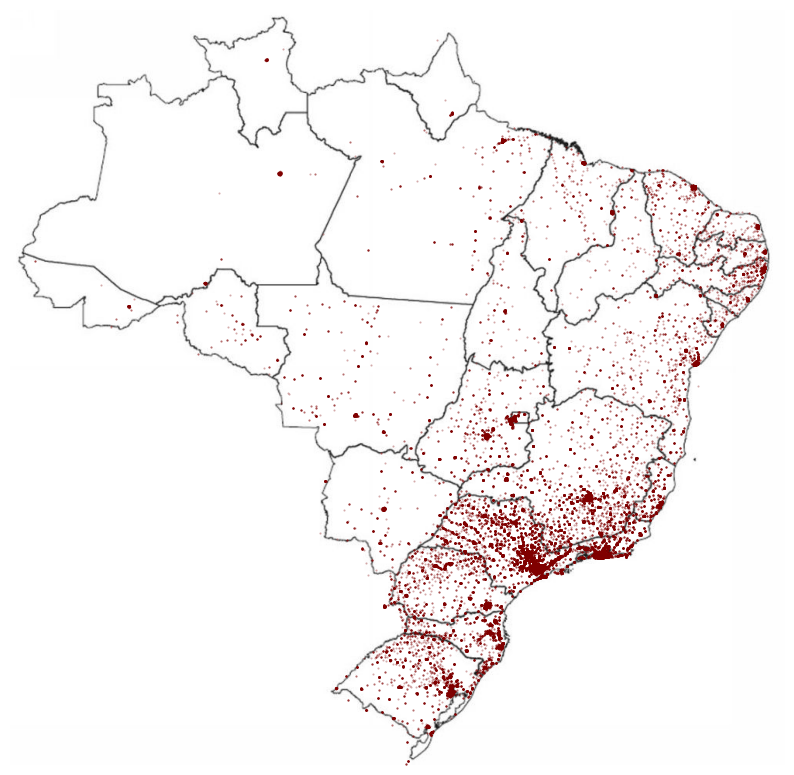

In [ ]:
customers_silver = customers_silver.drop_duplicates('order_id')

customers_silver.to_csv("/content/geolocation.csv", index=False)

def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Dalam blok kode tersebut, DataFrame customers_silver dihapuskan duplikat berdasarkan kolom 'order_id', kemudian hasilnya disimpan sebagai file CSV dengan nama "geolocation.csv".

Fungsi plot_brazil_map digunakan untuk membuat plot sebaran pelanggan pada peta Brasil. Peta Brasil diunduh menggunakan modul urllib dari URL yang diberikan. Kemudian, DataFrame customers_silver digunakan sebagai data untuk membuat plot sebaran pelanggan. Plot ini menggambarkan posisi geografis pelanggan dengan warna merah marun pada peta Brasil. Ukuran dan transparansi titik ditentukan oleh parameter s dan alpha. Peta Brasil ditampilkan sebagai latar belakang plot untuk memberikan konteks geografis. Hasilnya, plot sebaran pelanggan disajikan dengan warna merah marun pada peta Brasil.

### Pertanyaan 4 : Tingkat kepuasan pembelian terhadap layanan ?

In [ ]:
x = all_data['review_score'].value_counts().sort_values(ascending=False)

In [ ]:
x.index
x.values

array([66039, 22150, 13114,  9649,  3899])

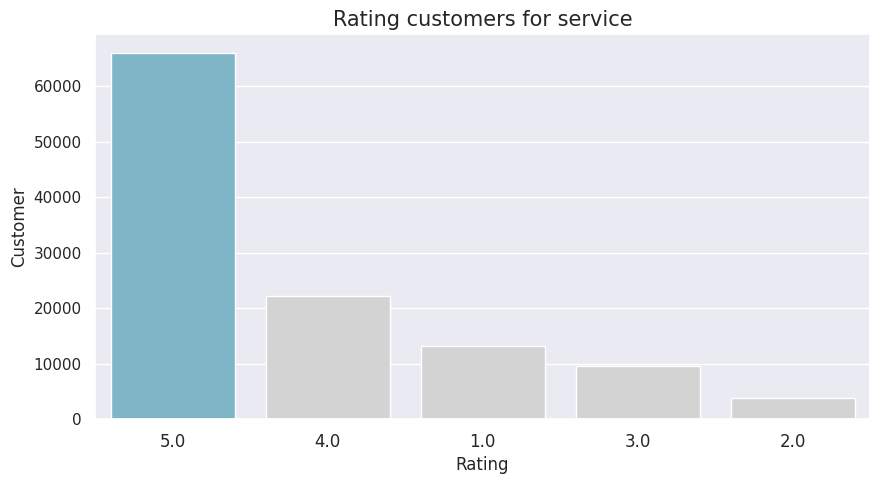

In [ ]:
rating_service = all_data['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

Kode tersebut menghasilkan diagram batang menggunakan Seaborn untuk memvisualisasikan distribusi nilai 'review_score' pada DataFrame 'all_data'. Pertama, dihitung frekuensi masing-masing nilai 'review_score' dan disusun secara menurun. Selanjutnya, nilai dengan frekuensi tertinggi ditentukan sebagai max_score. Diagram batang dibuat dengan menggunakan warna biru intens (#72BCD4) untuk nilai 'review_score' yang memiliki frekuensi tertinggi, dan warna abu-abu (#D3D3D3) untuk nilai lainnya. Diagram ini memberikan gambaran visual tentang sejauh mana pelanggan memberikan nilai untuk layanan, dengan fokus pada nilai yang paling sering muncul.

### Pertanyaan 5 : Bagaimana data pembelian order setiap bulan ?

In [ ]:
monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,334
2016-11-30,0
2016-12-31,1
2017-01-31,936
2017-02-28,1954
2017-03-31,3119
2017-04-30,2686
2017-05-31,4302


Kode tersebut menggunakan metode resample pada DataFrame 'all_data' untuk menggabungkan data bulanan berdasarkan kolom 'order_approved_at'. Pengelompokan dilakukan dengan aturan ('rule') setiap bulan ('M') dan dihitung jumlah pesanan ('order_id') pada setiap bulan. Hasilnya, DataFrame baru monthly_df berisi informasi tentang jumlah pesanan per bulan.

In [ ]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,334
2,November,0
3,December,1
4,January,936
5,February,1954
6,March,3119
7,April,2686
8,May,4302
9,June,3741


Dalam blok kode tersebut, indeks dari DataFrame monthly_df yang sebelumnya berupa objek DateTimeIndex diubah formatnya menjadi format bulan dalam string ('%B'). Ini dilakukan dengan menggunakan metode strftime('%B'), sehingga indeks akan berisi nama bulan.

Kemudian, DataFrame di-reset indeksnya sehingga indeks bulan menjadi kolom biasa, dan dilakukan perubahan nama kolom dari "order_id" menjadi "order_count" dengan menggunakan metode rename. Hasilnya adalah DataFrame monthly_df yang berisi informasi jumlah pesanan per bulan, dengan indeks yang mencerminkan nama bulan dan kolom "order_count".

In [ ]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_df

,order_approved_at,order_count
12,September,5061
13,October,5447
15,December,6671
22,July,7085
21,June,7314
23,August,7548
17,February,7850
19,April,7923
16,January,8309
20,May,8357


Dalam blok kode tersebut, DataFrame monthly_df diurutkan berdasarkan kolom 'order_count' secara menaik. Kemudian, dilakukan penghapusan duplikat berdasarkan kolom 'order_approved_at', tetapi hanya mempertahankan entri terakhir dari setiap bulan. Dengan demikian, DataFrame monthly_df yang dihasilkan berisi informasi jumlah pesanan per bulan, tetapi hanya mencakup data entri terakhir dari setiap bulan.

In [ ]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

monthly_df

,order_approved_at,order_count
16,January,8309
17,February,7850
18,March,8477
19,April,7923
20,May,8357
21,June,7314
22,July,7085
23,August,7548
12,September,5061
13,October,5447


Dalam blok kode tersebut, sebuah kamus (month_mapping) dibuat untuk memetakan nama bulan ke nilai numeriknya. Selanjutnya, kolom baru "month_numeric" ditambahkan ke DataFrame monthly_df dengan menggunakan metode map untuk memetakan nilai numerik sesuai dengan nama bulan dari kolom "order_approved_at". Setelah itu, DataFrame diurutkan berdasarkan kolom "month_numeric" dan kolom tersebut dihapus untuk mengembalikan DataFrame ke keadaan semula. Hasilnya adalah DataFrame monthly_df yang berisi informasi jumlah pesanan per bulan, dengan urutan bulan yang sesuai dengan nilai numeriknya.

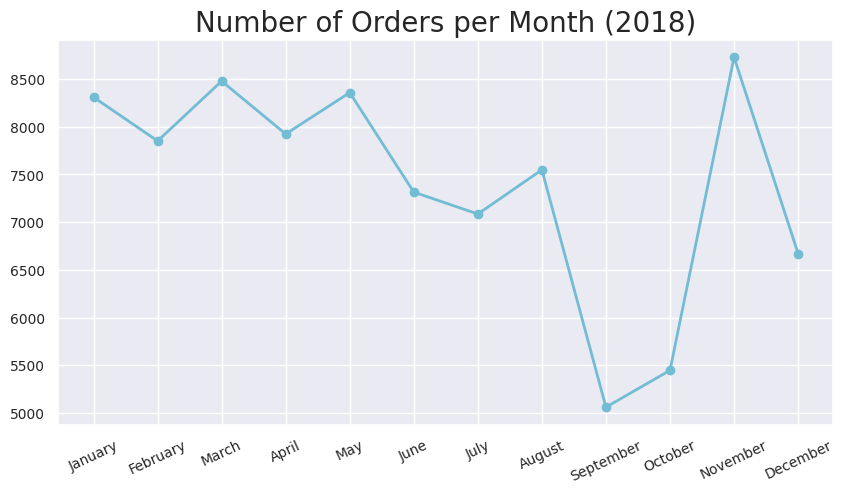

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Dalam blok kode tersebut, sebuah plot garis dibuat menggunakan pustaka Matplotlib. Garis tersebut menggambarkan jumlah pesanan (order_count) per bulan (order_approved_at) dalam DataFrame monthly_df. Beberapa parameter gaya seperti marker, linewidth, dan color digunakan untuk memberikan tampilan yang jelas pada plot. Judul dan label sumbu diberikan untuk memberikan konteks visual kepada pembaca.

Hasilnya adalah sebuah plot garis yang memvisualisasikan tren jumlah pesanan per bulan selama tahun 2018. Grafik tersebut memberikan gambaran tentang fluktuasi aktivitas pesanan dari bulan ke bulan.

In [ ]:
sum_spend_df = all_data.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,41806.47
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,116340.65
5,2017-02-28,247256.72
6,2017-03-31,379145.35
7,2017-04-30,359235.80
8,2017-05-31,533236.63
9,2017-06-30,449544.02


Dalam blok kode tersebut, DataFrame all_data diresample dengan aturan bulanan ('M') berdasarkan kolom 'order_approved_at', dan kemudian dihitung jumlah total belanja (price) untuk setiap bulan. Hasilnya, DataFrame baru sum_spend_df berisi informasi tentang total belanja per bulan.

In [ ]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')

sum_spend_df

,order_approved_at,total_spend
0,September,134.97
1,October,41806.47
2,November,0.00
3,December,10.90
4,January,116340.65
5,February,247256.72
6,March,379145.35
7,April,359235.80
8,May,533236.63
9,June,449544.02


Dalam blok kode tersebut, kolom 'order_approved_at' dalam DataFrame sum_spend_df diubah formatnya menjadi nama bulan dalam string ('%B'). Pengubahan format ini dilakukan menggunakan metode dt.strftime('%B'). Hasilnya adalah DataFrame sum_spend_df yang memiliki kolom timestamp bulan ('order_approved_at') dengan nilai dalam format nama bulan.

In [ ]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,636927.93
13,October,685305.29
15,December,777279.75
17,February,862970.18
22,July,880146.02
23,August,893243.80
21,June,904252.25
16,January,960168.41
19,April,987079.65
18,March,1008918.50


Dalam blok kode tersebut, DataFrame sum_spend_df diurutkan berdasarkan kolom 'total_spend' secara menaik. Selanjutnya, dilakukan penghapusan duplikat berdasarkan kolom 'order_approved_at', tetapi hanya mempertahankan entri terakhir dari setiap bulan. Dengan demikian, DataFrame sum_spend_df yang dihasilkan berisi informasi tentang total belanja per bulan, tetapi hanya mencakup data entri terakhir dari setiap bulan.

In [ ]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    960168.41
17          February    862970.18
18             March   1008918.50
19             April    987079.65
20               May   1036929.39
21              June    904252.25
22              July    880146.02
23            August    893243.80
12         September    636927.93
13           October    685305.29
14          November   1015674.13
15          December    777279.75


Dalam blok kode tersebut, dibuat kolom kategori baru 'month_cat' berdasarkan kolom 'order_approved_at' dengan urutan yang telah ditentukan sesuai dengan custom_order. Kolom ini dianggap sebagai tipe data kategori yang dipesan. DataFrame sum_spend_df kemudian diurutkan berdasarkan kolom kategori tersebut. Akhirnya, kolom kategori 'month_cat' dihapus dari DataFrame untuk memberikan hasil akhir.

Hasilnya adalah DataFrame sorted_df yang berisi informasi tentang total belanja per bulan, diurutkan berdasarkan urutan bulan yang telah ditentukan.

In [ ]:
sum_spend_df

,order_approved_at,total_spend,month_cat
12,September,636927.93,September
13,October,685305.29,October
15,December,777279.75,December
17,February,862970.18,February
22,July,880146.02,July
23,August,893243.80,August
21,June,904252.25,June
16,January,960168.41,January
19,April,987079.65,April
18,March,1008918.50,March


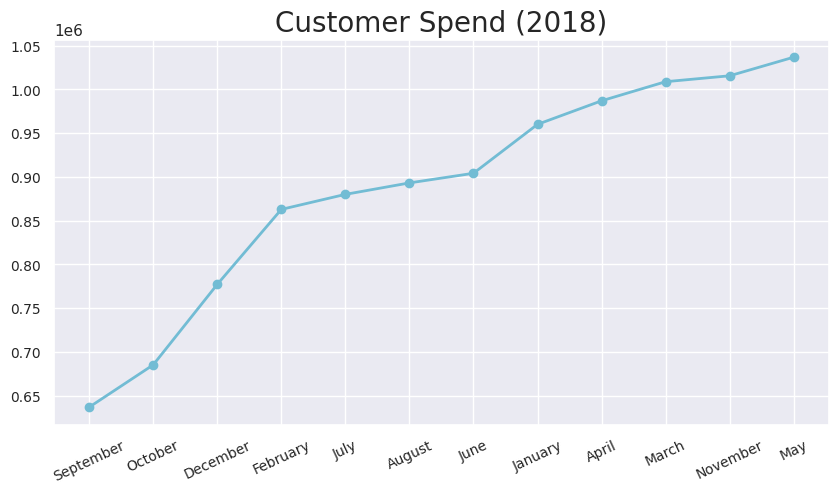

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Customer Spend (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

Dalam blok kode tersebut, sebuah plot garis dibuat menggunakan pustaka Matplotlib. Garis tersebut menggambarkan total belanja (total_spend) pelanggan per bulan (order_approved_at) dalam DataFrame sum_spend_df. Beberapa parameter gaya seperti marker, linewidth, dan color digunakan untuk memberikan tampilan yang jelas pada plot. Judul dan label sumbu diberikan untuk memberikan konteks visual kepada pembaca.

Hasilnya adalah sebuah plot garis yang memvisualisasikan tren total belanja pelanggan per bulan selama tahun 2018. Grafik tersebut memberikan gambaran tentang fluktuasi total belanja dari bulan ke bulan.

### RFM

In [ ]:
rfm

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,339.0,1,89.80
1,000161a058600d5901f007fab4c27140,460.0,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,598.0,1,179.99
3,0002414f95344307404f0ace7a26f1d5,429.0,1,149.90
4,000379cdec625522490c315e70c7a9fb,200.0,1,93.00
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,204.0,3,164.70
99437,fffeda5b6d849fbd39689bb92087f431,150.0,1,47.90
99438,ffff42319e9b2d713724ae527742af25,128.0,1,199.90
99439,ffffa3172527f765de70084a7e53aae8,412.0,2,21.80


In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   Recency      96470 non-null  float64
 2   Frequency    99441 non-null  int64  
 3   Monetary     99441 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ MB


Text(0.5, 0.98, 'Best Customer Based on RFM Parameters (customer_id)')

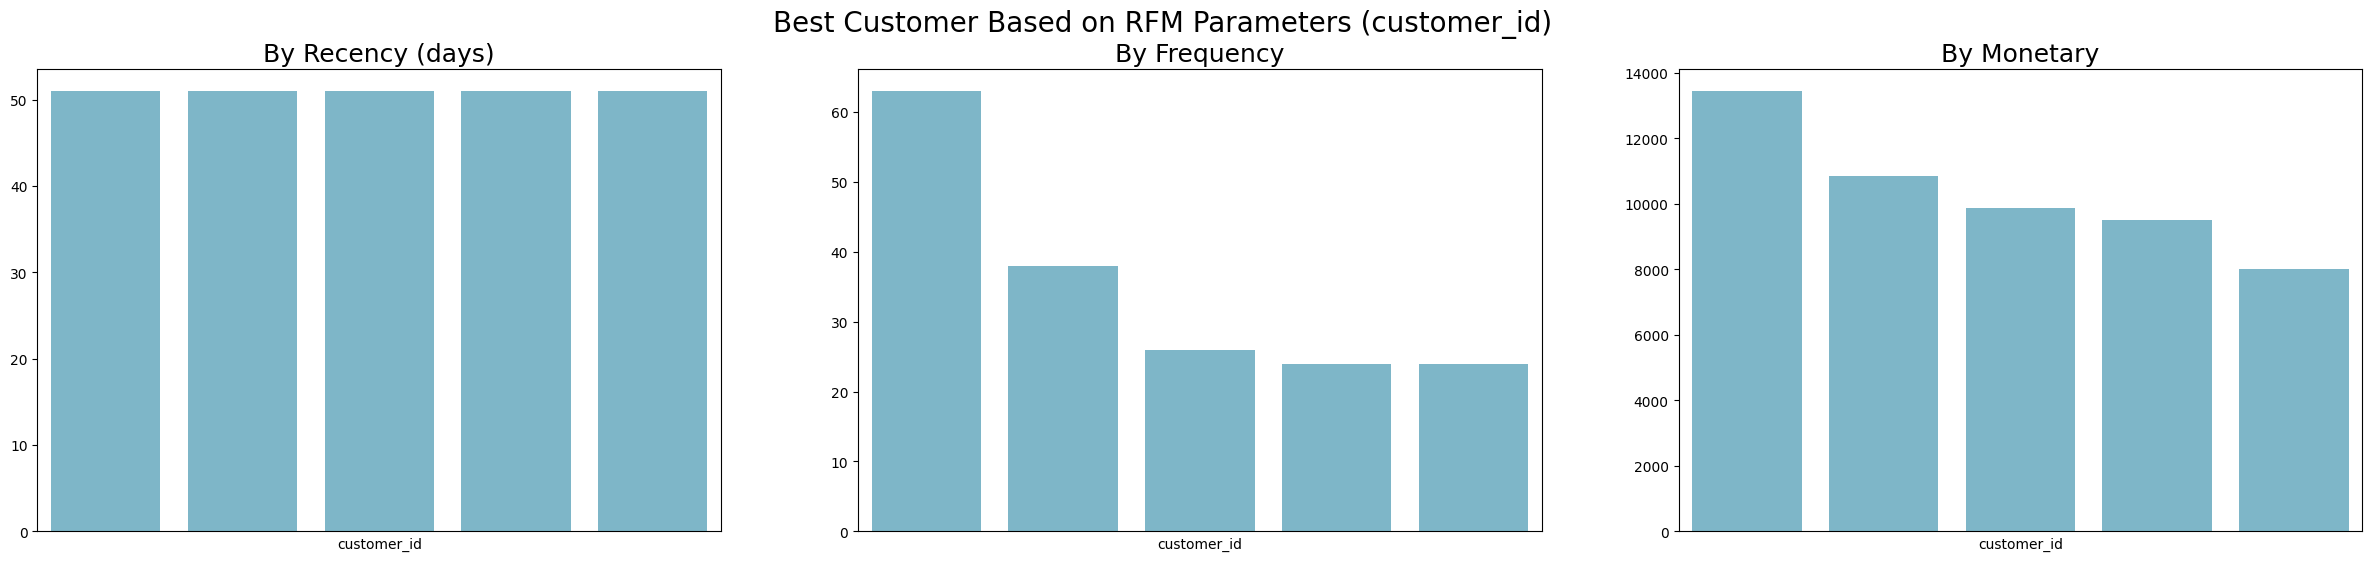

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id


sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)

## Conclusion

**Produk dengan penjualan terbanyak ? Termasuk dalam kategori produk mahal atau murah ?**

Setelah melakukan visualisasi, terlihat bahwa barang dengan pembelian terbesar adalah produk **furniture_decor** dan pembelian terkecil adalah produk **security_and_services**. Untuk  pembelian barang ketika mahal dan tidak mereka mendapatkan untung dengan penjualan yang kecil namun banyak seperti yang tertera pada grafik.

**Berapa rata-rata pengeluaran pelanggan ? Apakah berhubungan dengan geografis ?**

Sebagian besar produk di 50 teratas mengalami peningkatan kemungkinan penjualan selama **Black Friday (BF)**.

**Lokasi geografis mana yang memiliki pelanggan terbanyak ?**

Berdasarkan grafik yang dibuat, pelanggan di wilayah **tenggara dan selatan** lebih banyak. Dan mayoritas berada di kota-kota besar seperti Sao Paulo, Rio de Jeneiro dan lain-lain.

**Tingkat kepuasan pembelian terhadap layanan ?**

Pada grafik yang dibuat, kebanyakan pelanggan merasa **puas** terhadap pelayanan yang mereka berikan dengan rating mencapai **60000 ribu** respon yang memberikan nilai rata-rata 5.

**Bagaimana data pembelian order setiap bulan ?**

Data pembelian setiap bulan memiliki kenaikan dan **penurunan** yang stabil kecuali pada bulan **September** dengan ditandai pembelian yang terjun bebas. Namun penjualan kembali **naik** pada bulan **Oktober** dan terjadi lonjakan pembelian yang **tertinggi** diantara bulan lainnya saat bulan **November** (2018)